In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [6]:
df = pd.read_csv("spam.csv", encoding = 'Windows-1252')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [10]:
df['target'] = df['v1'].apply(lambda x:1 if x == 'ham' else 0)

In [11]:
df.head()

,v1,v2,target
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [13]:
df.drop('v1', axis=1)

,v2,target
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0
5568,Will Ì_ b going to esplanade fr home?,1
5569,"Pity, * was in mood for that. So...any other s...",1
5570,The guy did some bitching but I acted like i'd...,1


In [14]:
x = df['v2']
y = df['target']

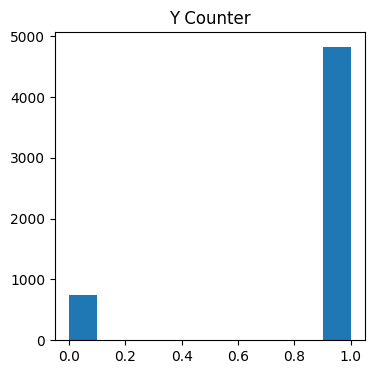

In [20]:
plt.figure(figsize=(4, 4))
plt.hist(y)
plt.xlabel = 'target'
plt.ylabel = 'count'
plt.title('Y Counter')
plt.show() 

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [22]:
import re
import string
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = text.strip()
    return text

In [23]:
df['v2'] = df['v2'].apply(preprocess_text)

In [24]:
df.head()

,v1,v2,target
0,ham,go until jurong point crazy available only in ...,1
1,ham,ok lar joking wif u oni,1
2,spam,free entry in a wkly comp to win fa cup final...,0
3,ham,u dun say so early hor u c already then say,1
4,ham,nah i dont think he goes to usf he lives aroun...,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['target'], test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_tfidf, y_train)

y_pred = logistic_model.predict(X_test_tfidf)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [31]:
accuracy

0.9623205741626795

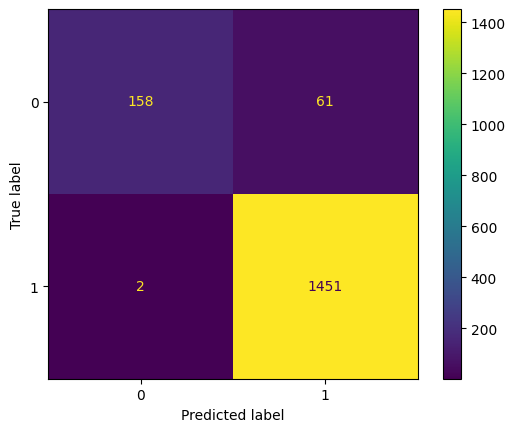

In [33]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [34]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.99      0.72      0.83       219\n           1       0.96      1.00      0.98      1453\n\n    accuracy                           0.96      1672\n   macro avg       0.97      0.86      0.91      1672\nweighted avg       0.96      0.96      0.96      1672\n'